
# Initialize

In [1]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *

In [2]:
dhcp_train_loader, dhcp_test_loader, dhcp_val_loader = get_dataloader('dhcp',100,modality='t2')
hcp_train_loader, hcp_test_loader, hcp_val_loader = get_dataloader('hcp',100,modality='t2')

dhcp_t2_1500 = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/dhcp_t2_1500.pth')
dhcp_t2_1500_aug = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/dhcp_t2_1500_aug.pth')
hcp_t2_140_aug = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/hcp_t2_140_aug.pth')

hcp_t2_140_aug.eval()
hcp_t2_140_aug.cuda()
dhcp_t2_1500.eval()
dhcp_t2_1500.cuda()
dhcp_t2_1500_aug.eval()
dhcp_t2_1500_aug.cuda()

[09/16/22 17:36:22] INFO     colossalai - root - INFO: Creating dataset with 80 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 80

  0%|          | 0/80 [00:00<?, ?it/s]

[09/16/22 17:36:25] INFO     colossalai - root - INFO: Creating dataset with 20 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 20

  0%|          | 0/20 [00:00<?, ?it/s]

                    INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[09/16/22 17:36:27] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

BUNet3D(
  (encoders): ModuleList(
    (0): Encoder(
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 1, eps=1e-05, affine=True)
          (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        (SingleConv2): SingleConv(
          (groupnorm): GroupNorm(1, 8, eps=1e-05, affine=True)
          (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
      )
    )
    (1): Encoder(
      (pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 16, eps=1e-05, affine=True)
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
       

In [3]:
data_root = '/media/hdd/viscent/FLYWHEEL_BROWN/BROWN/SUBJECTS'
subject_list = os.listdir(data_root)
# Exclude hidden files
subject_list = [x for x in subject_list if not x.startswith('.')]
t2_file_list = []
for subject in subject_list:
    tmp = os.listdir(os.path.join(data_root, subject, 'SESSIONS'))
    tmp = [x for x in tmp if not x.startswith('.')]
    session = tmp[0]
    tmp = os.listdir(os.path.join(data_root, subject, 'SESSIONS', session, 'ACQUISITIONS'))
    tmp = [x for x in tmp if x.find('T2') != -1 and x.find('AXI') != -1 and not x.startswith('.')]
    if len(tmp) == 0:
        continue
    nifti_dir = os.path.join(data_root, subject, 'SESSIONS', session, 'ACQUISITIONS', tmp[0], 'FILES')
    nifti_file = os.listdir(nifti_dir)
    nifti_file = [x for x in nifti_file if x.endswith('.nii.gz') and not x.startswith('.')][0]
    t2_file_list.append(os.path.join(nifti_dir, nifti_file))


## Preprocessing

In [9]:
import shutil

for i,t2_file in enumerate(t2_file_list):
    shutil.copy(t2_file, '/media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_raw/%03d.nii.gz'%i)
    os.system('bet2 /media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_raw/%03d.nii.gz /media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_brain/%03d.nii.gz'% (i,i))

In [11]:
for i in range(113):
    os.system('flirt -in /media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_brain/%03d.nii.gz -ref /media/hdd/viscent/SR-UNet/inference/Template_dHCP.nii.gz -out /media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_reg/%03d.nii.gz'% (i,i))


Final result: 
0.097415 -0.075573 -0.679350 123.527223 
-0.042392 0.753587 -0.149819 17.827600 
0.788458 0.067552 0.104333 -1.524559 
0.000000 0.000000 0.000000 1.000000 


Final result: 
-0.012858 -0.239369 -0.720638 173.624255 
-0.046686 0.764112 -0.145254 10.248861 
0.778178 0.054591 0.046926 2.086636 
0.000000 0.000000 0.000000 1.000000 


Final result: 
-0.044277 -0.014296 -0.729924 134.591992 
0.003228 0.749314 -0.030424 0.589731 
0.742170 0.000962 -0.046207 19.306903 
0.000000 0.000000 0.000000 1.000000 


Final result: 
-0.161719 0.046834 -0.710888 138.715748 
0.019304 0.699681 -0.015276 8.823828 
0.749340 -0.013568 -0.179409 23.651455 
0.000000 0.000000 0.000000 1.000000 


Final result: 
0.095646 0.104757 -0.679562 115.541731 
-0.018467 0.755144 0.006462 4.772346 
0.761878 0.007360 0.069567 8.075729 
0.000000 0.000000 0.000000 1.000000 


Final result: 
0.640717 0.173220 0.014730 2.084022 
0.133769 -0.513423 -0.545093 173.133921 
-0.147562 0.414933 -0.544700 98.251680 
0.000

In [14]:
images = []
image_tensors = []
t2_file_list = os.listdir('/media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_reg/')
t2_file_list = [os.path.join('/media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_reg/',x) for x in t2_file_list]
for t2_file in t2_file_list:
    images.append(sitk.ReadImage(t2_file))
    subject = tio.Subject(t2=tio.ScalarImage(t2_file))
    transform_1 = tio.Compose([
        tio.transforms.RescaleIntensity(0., 1.),
        tio.transforms.ToCanonical(),
        tio.transforms.Resample((1.,1.,1.)),
    ])
    subject = transform_1(subject)
    edge_max = max(subject.t2.data.shape)
    padding = ((edge_max - subject.t2.data.shape[1]) // 2, 
                (edge_max - subject.t2.data.shape[2]) // 2,
                    (edge_max - subject.t2.data.shape[3]) // 2)
    transform_2 = tio.Compose([
        tio.Pad(padding),
        tio.transforms.Resize((160,160,160)),
    ])
    subject = transform_2(subject)
    image_tensor = subject.t2.data.unsqueeze(0).float()
    image_tensors.append(image_tensor)

/home/viscent/anaconda3/envs/bunet/lib/python3.10/site-packages/torchio/transforms/preprocessing/intensity/rescale.py:99: RuntimeWarning:

Rescaling image "t2" not possible because all the intensity values are the same



## Sanity Check on Training Data

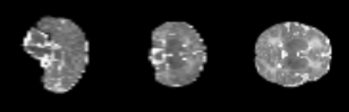

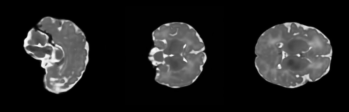

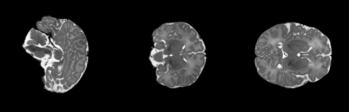

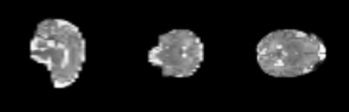

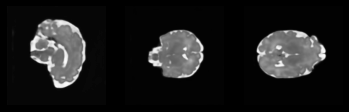

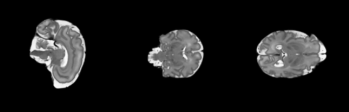

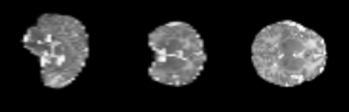

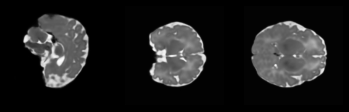

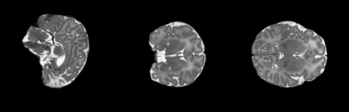

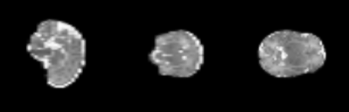

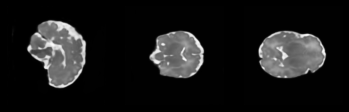

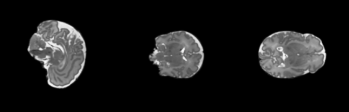

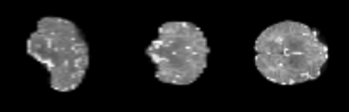

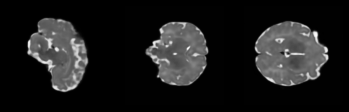

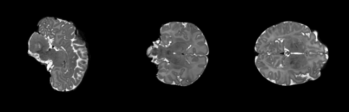

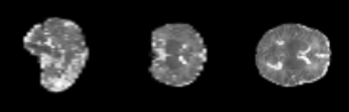

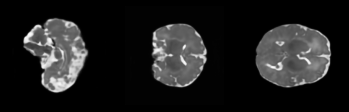

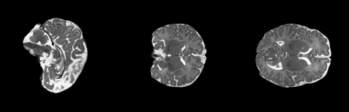

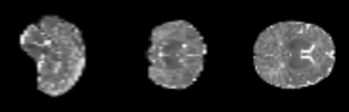

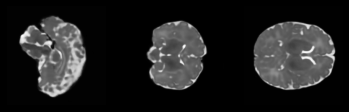

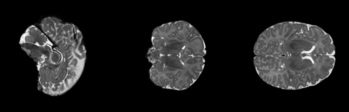

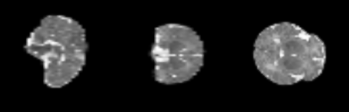

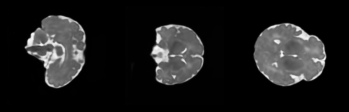

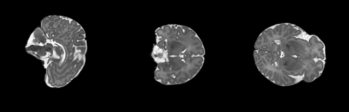

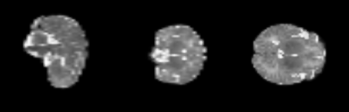

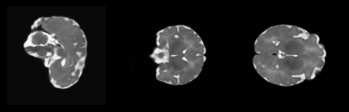

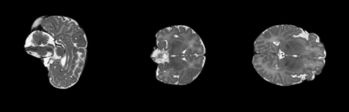

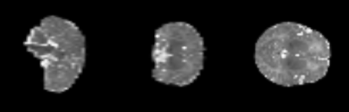

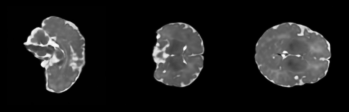

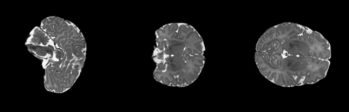

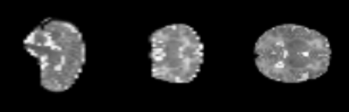

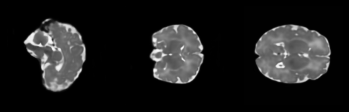

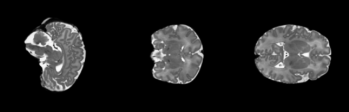

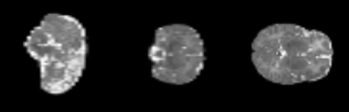

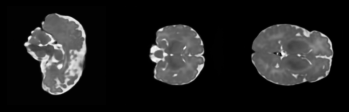

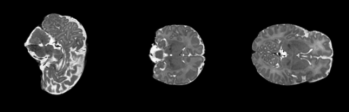

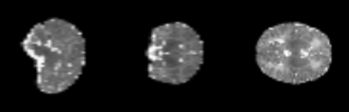

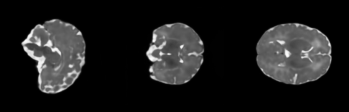

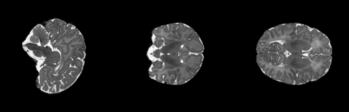

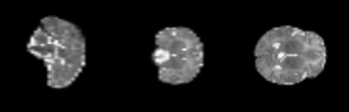

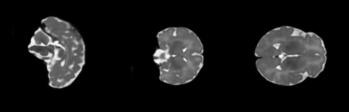

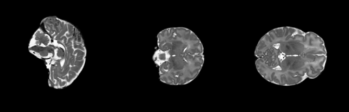

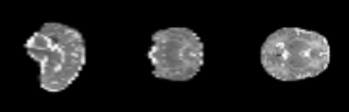

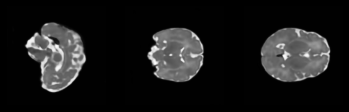

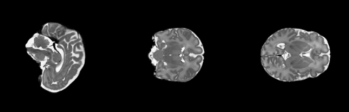

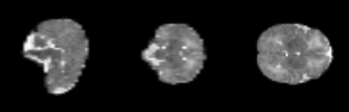

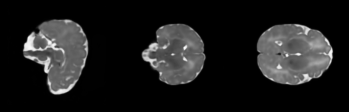

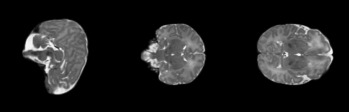

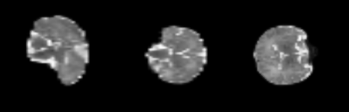

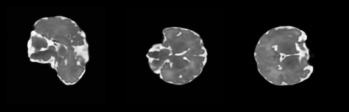

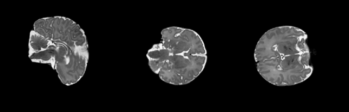

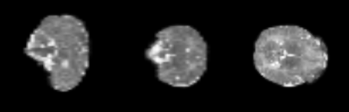

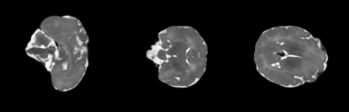

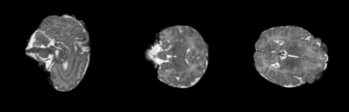

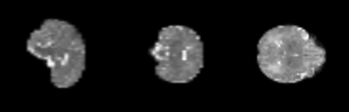

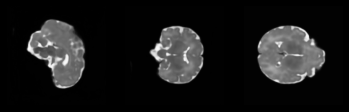

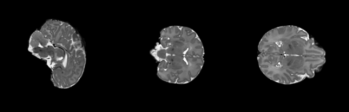

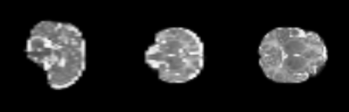

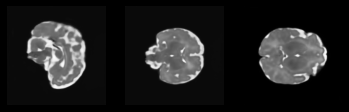

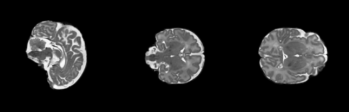

In [20]:
for image_tensor, target_tensor in dhcp_val_loader:
    image_tensor = image_tensor.cuda()
    target_tensor = target_tensor.cuda()
    output_tensor = dhcp_t2_1500(image_tensor).detach().cpu().numpy()
    display_multiplanar_center(image_tensor.detach().cpu().numpy()[0,0])
    display_multiplanar_center(output_tensor[0,0])
    display_multiplanar_center(target_tensor.detach().cpu().numpy()[0,0])

## Testing on FLYWHEEL_BROWN data

  0%|          | 0/113 [00:00<?, ?it/s]

#################0#################


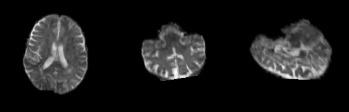

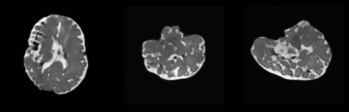

####################################
#################1#################


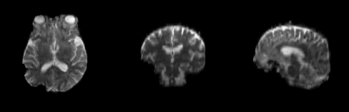

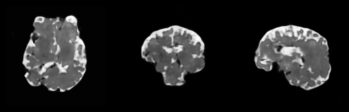

####################################
#################2#################


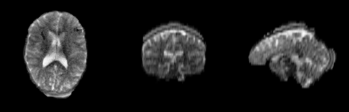

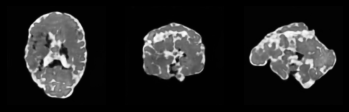

####################################
#################3#################


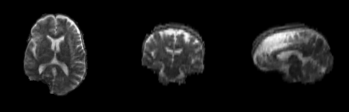

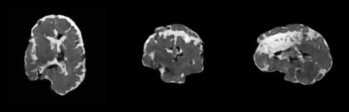

####################################
#################4#################


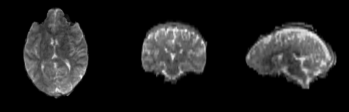

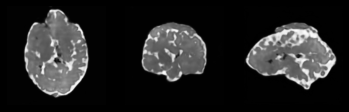

####################################
#################5#################


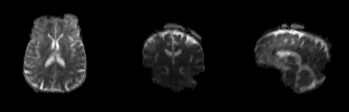

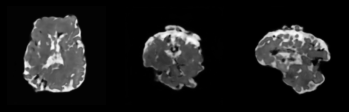

####################################
#################6#################


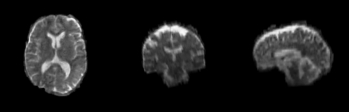

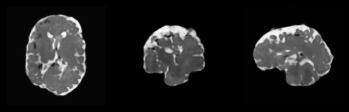

####################################
#################7#################


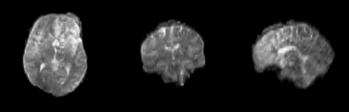

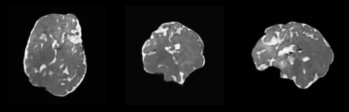

####################################
#################8#################


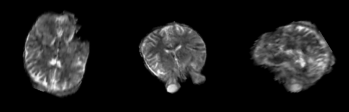

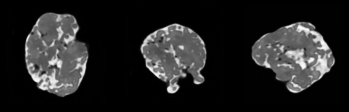

####################################
#################9#################


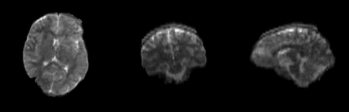

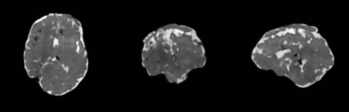

####################################
#################10#################


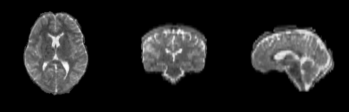

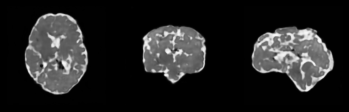

####################################
#################11#################


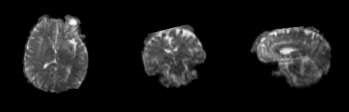

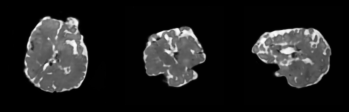

####################################
#################12#################


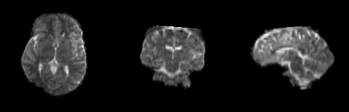

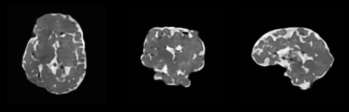

####################################
#################13#################


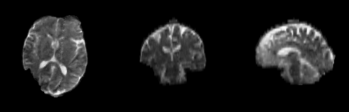

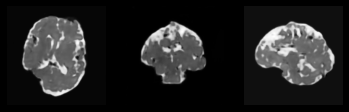

####################################
#################14#################


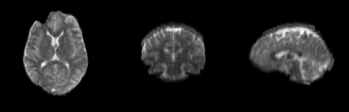

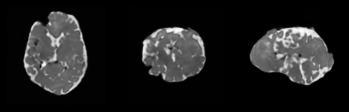

####################################
#################15#################


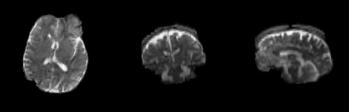

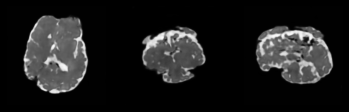

####################################
#################16#################


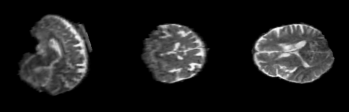

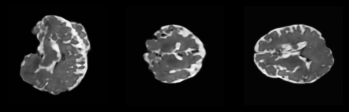

####################################
#################17#################


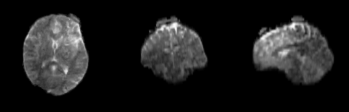

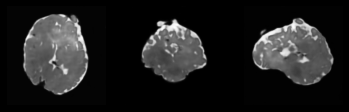

####################################
#################18#################


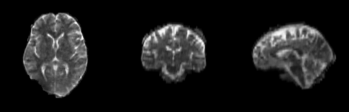

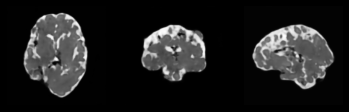

####################################
#################19#################


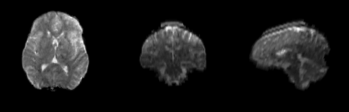

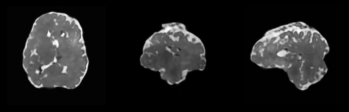

####################################
#################20#################


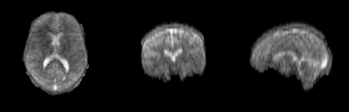

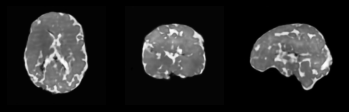

####################################
#################21#################


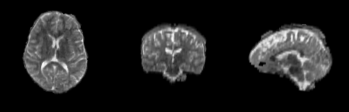

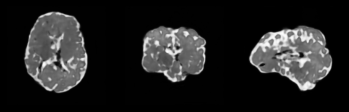

####################################
#################22#################


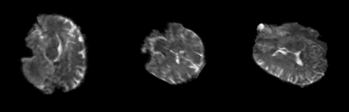

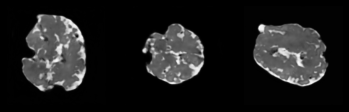

####################################
#################23#################


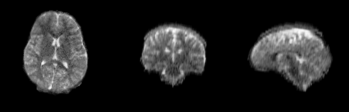

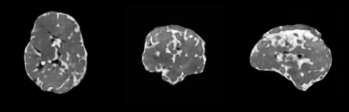

####################################
#################24#################


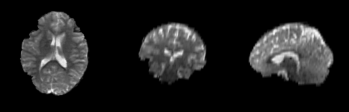

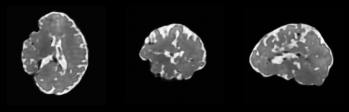

####################################
#################25#################


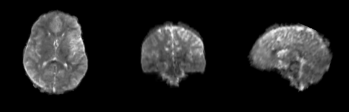

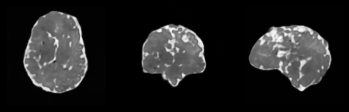

####################################
#################26#################


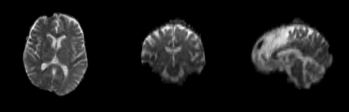

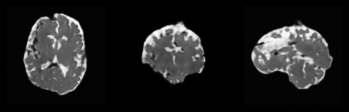

####################################
#################27#################


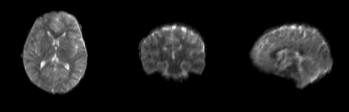

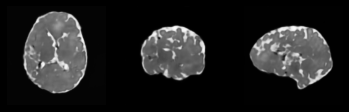

####################################
#################28#################


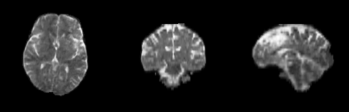

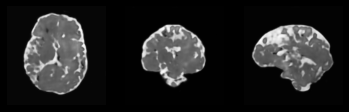

####################################
#################29#################


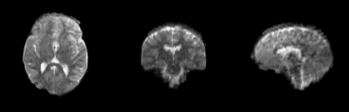

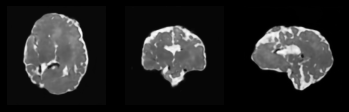

####################################
#################30#################


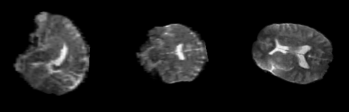

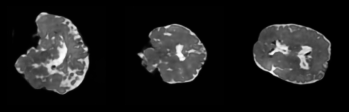

####################################
#################31#################


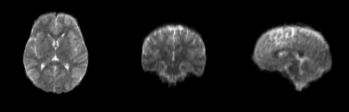

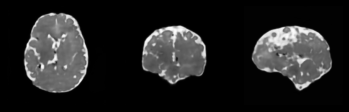

####################################
#################32#################


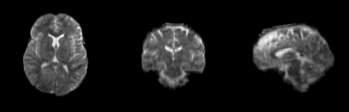

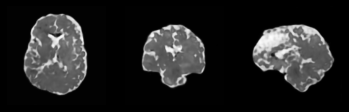

####################################
#################33#################


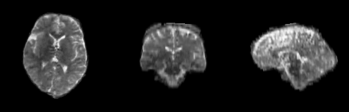

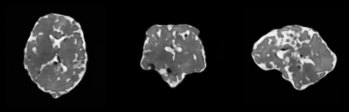

####################################
#################34#################


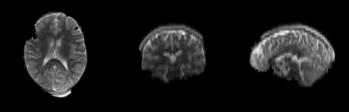

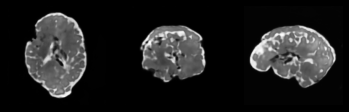

####################################
#################35#################


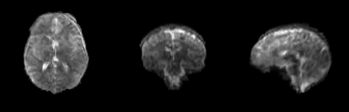

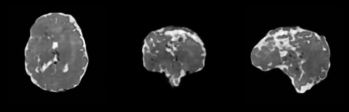

####################################
#################36#################


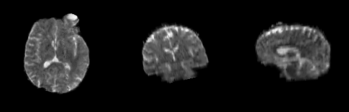

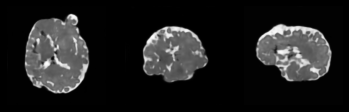

####################################
#################37#################


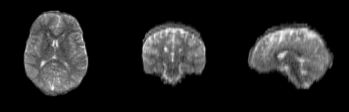

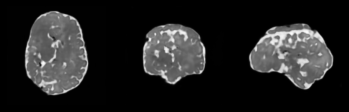

####################################
#################38#################


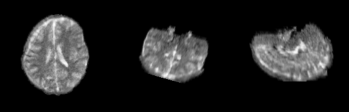

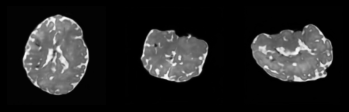

####################################
#################39#################


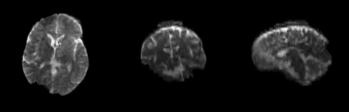

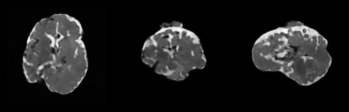

####################################
#################40#################


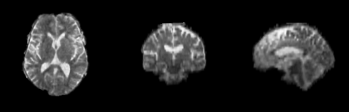

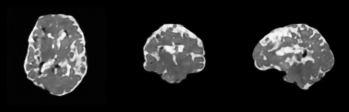

####################################
#################41#################


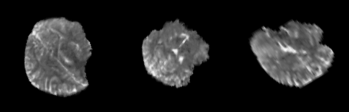

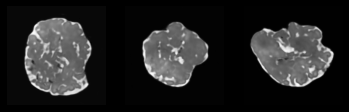

####################################
#################42#################


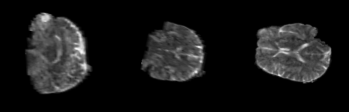

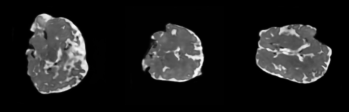

####################################
#################43#################


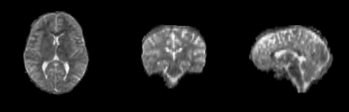

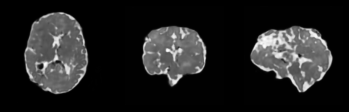

####################################
#################44#################


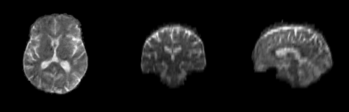

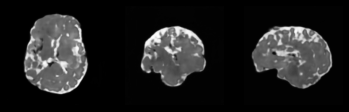

####################################
#################45#################


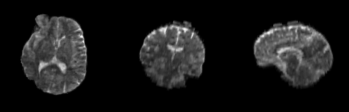

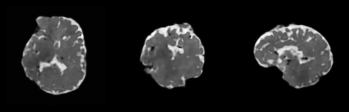

####################################
#################46#################


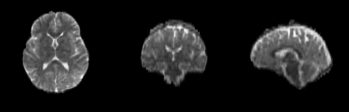

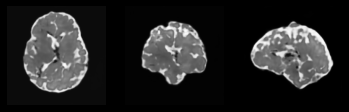

####################################
#################47#################


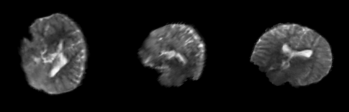

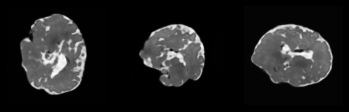

####################################
#################48#################


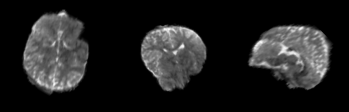

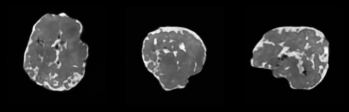

####################################
#################49#################


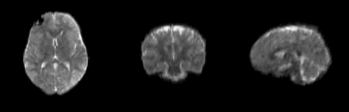

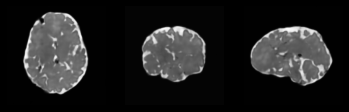

####################################
#################50#################


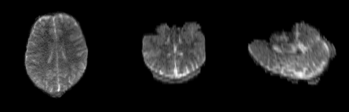

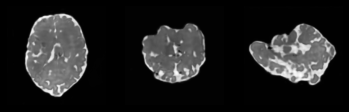

####################################
#################51#################


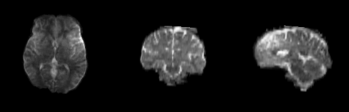

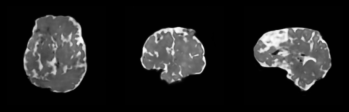

####################################
#################52#################


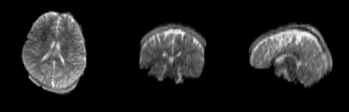

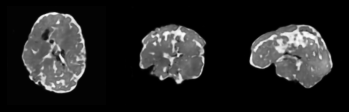

####################################
#################53#################


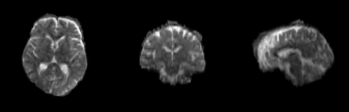

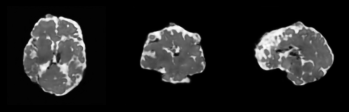

####################################
#################54#################


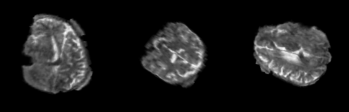

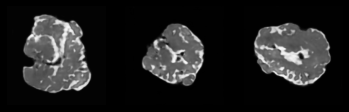

####################################
#################55#################


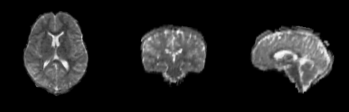

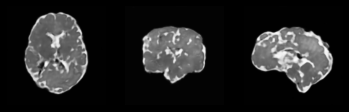

####################################
#################56#################


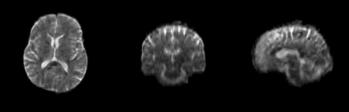

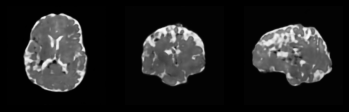

####################################
#################57#################


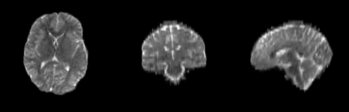

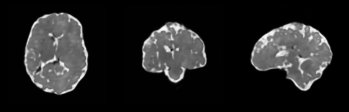

####################################
#################58#################


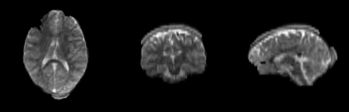

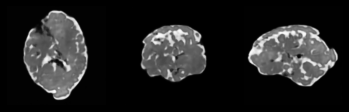

####################################
#################59#################


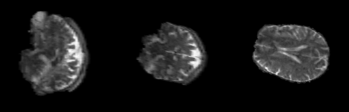

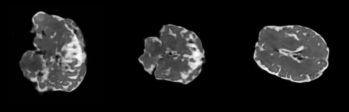

####################################
#################60#################


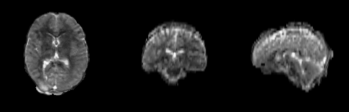

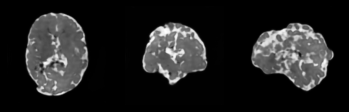

####################################
#################61#################


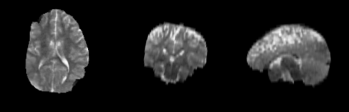

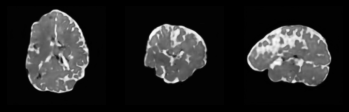

####################################
#################62#################


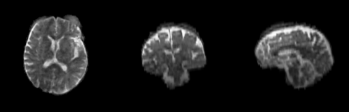

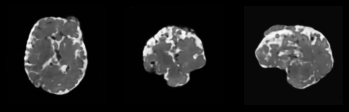

####################################
#################63#################


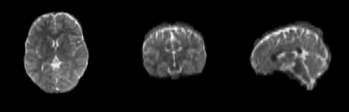

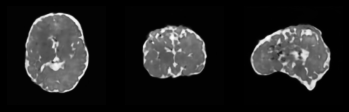

####################################
#################64#################


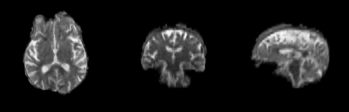

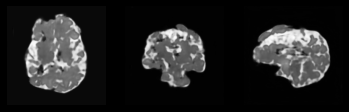

####################################
#################65#################


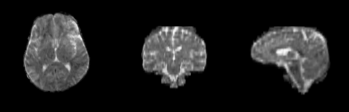

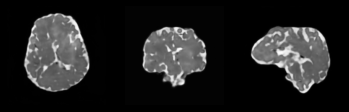

####################################
#################66#################


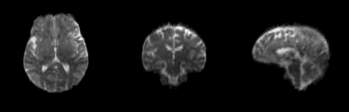

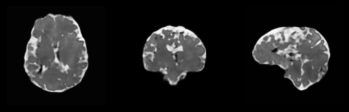

####################################
#################67#################


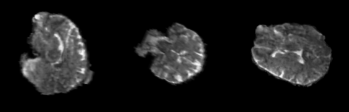

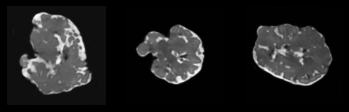

####################################
#################68#################


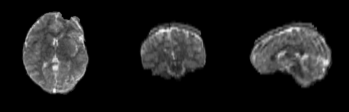

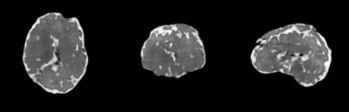

####################################
#################69#################


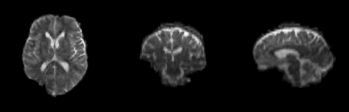

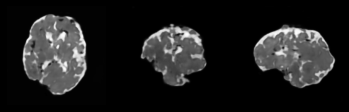

####################################
#################70#################


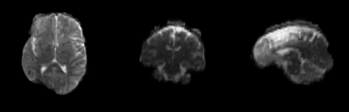

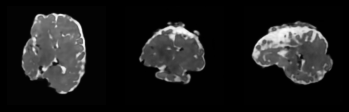

####################################
#################71#################


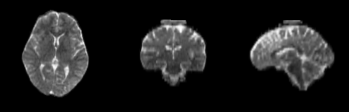

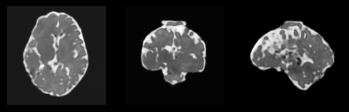

####################################
#################72#################


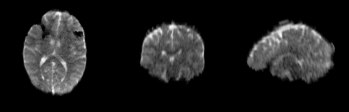

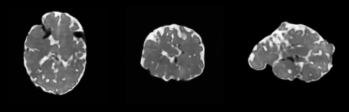

####################################
#################73#################


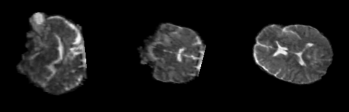

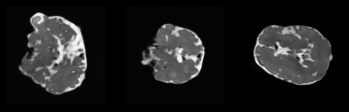

####################################
#################74#################


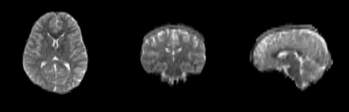

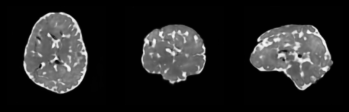

####################################
#################75#################


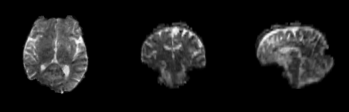

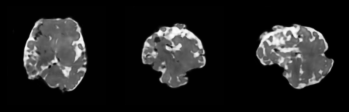

####################################
#################76#################


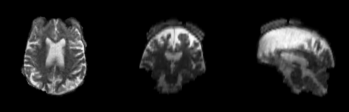

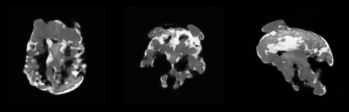

####################################
#################77#################


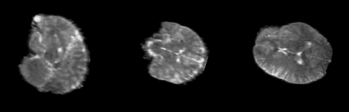

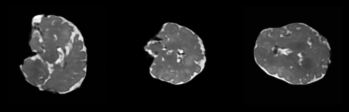

####################################
#################78#################


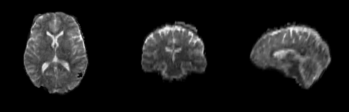

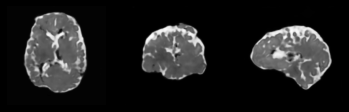

####################################
#################79#################


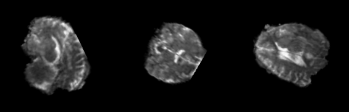

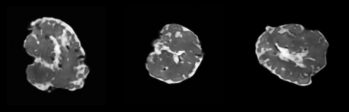

####################################
#################80#################


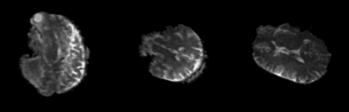

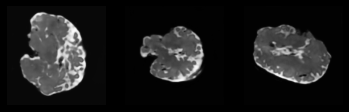

####################################
#################81#################


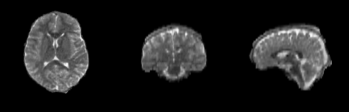

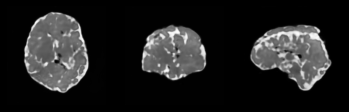

####################################
#################82#################


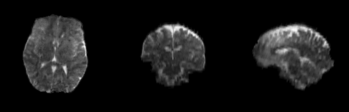

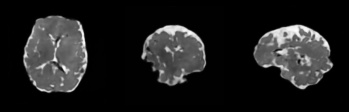

####################################
#################83#################


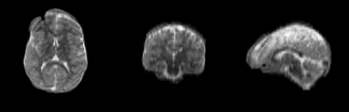

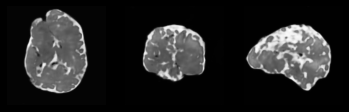

####################################
#################84#################


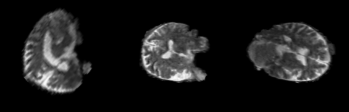

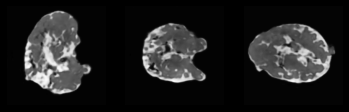

####################################
#################85#################


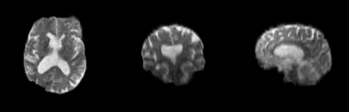

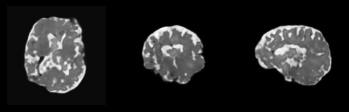

####################################
#################86#################


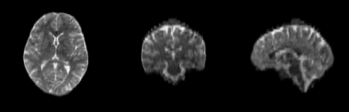

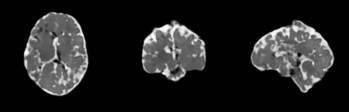

####################################
#################87#################


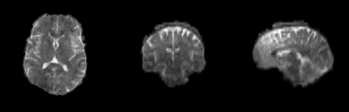

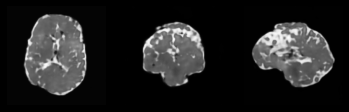

####################################
#################88#################


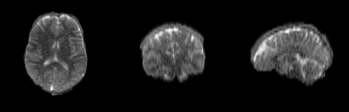

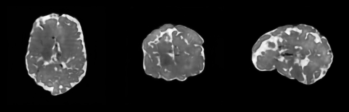

####################################
#################89#################


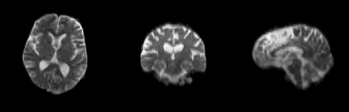

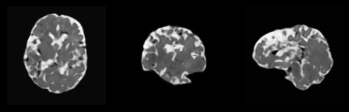

####################################
#################90#################


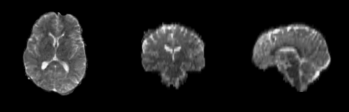

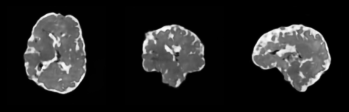

####################################
#################91#################


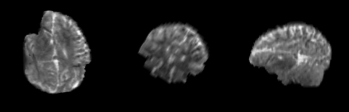

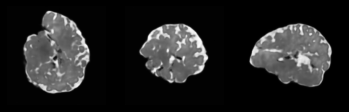

####################################
#################92#################


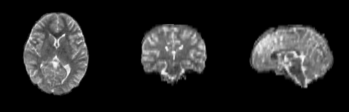

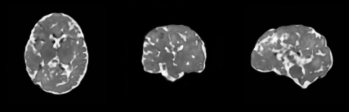

####################################
#################93#################


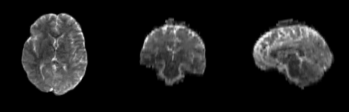

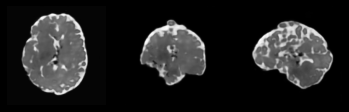

####################################
#################94#################


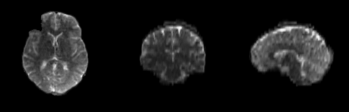

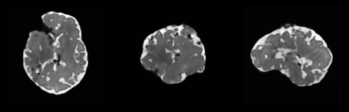

####################################
#################95#################


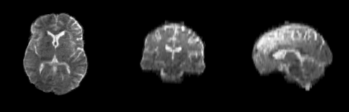

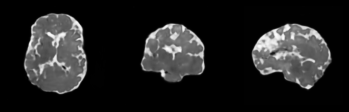

####################################
#################96#################


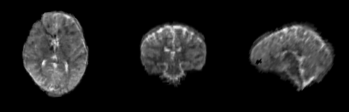

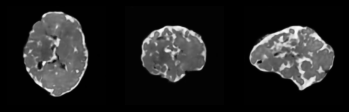

####################################
#################97#################


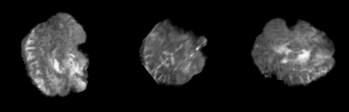

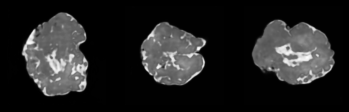

####################################
#################98#################


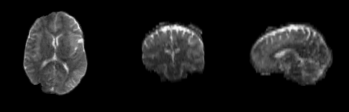

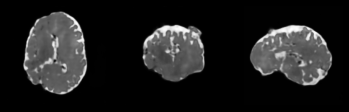

####################################
#################99#################


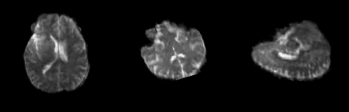

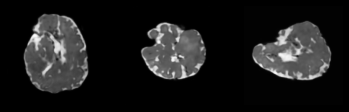

####################################
#################100#################


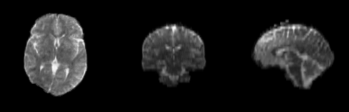

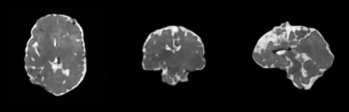

####################################
#################101#################


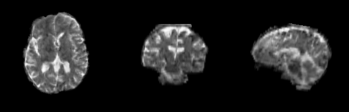

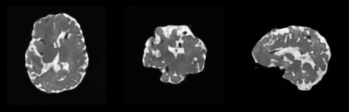

####################################
#################102#################


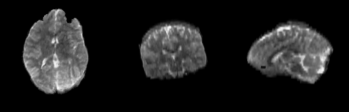

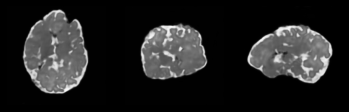

####################################
#################103#################


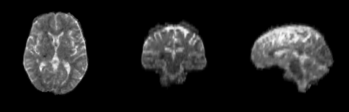

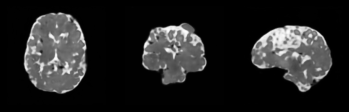

####################################
#################104#################


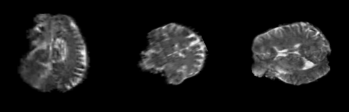

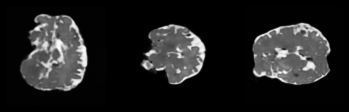

####################################
#################105#################


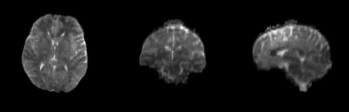

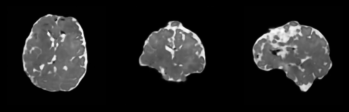

####################################
#################106#################


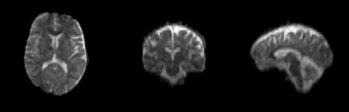

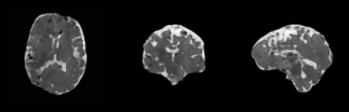

####################################
#################107#################


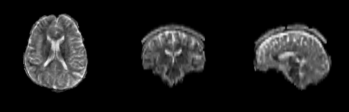

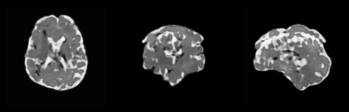

####################################
#################108#################


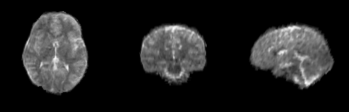

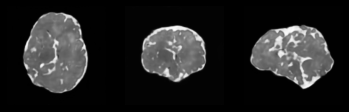

####################################
#################109#################


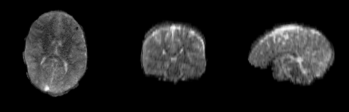

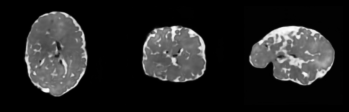

####################################
#################110#################


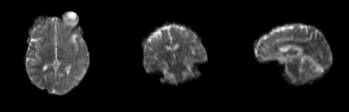

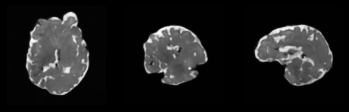

####################################
#################111#################


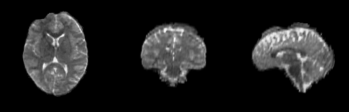

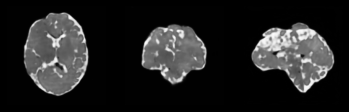

####################################
#################112#################


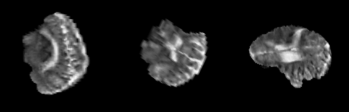

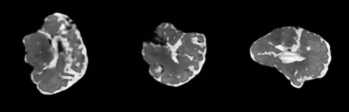

####################################


In [24]:
import os


output_tensors_dhcp_1500 = []
output_tensors_dhcp_1500_aug = []
output_tensors_hcp_140_aug = []

data_root = '/media/hdd/viscent/FLYWHEEL_BROWN/'

outdir_dhcp_1500 = os.path.join(data_root, 'output_dhcp_1500')
outdir_dhcp_1500_aug = os.path.join(data_root, 'output_dhcp_1500_aug')
outdir_hcp_140_aug = os.path.join(data_root, 'output_hcp_140_aug')
# os.mkdir(outdir_dhcp_1500)
# os.mkdir(outdir_dhcp_1500_aug)
# os.mkdir(outdir_hcp_140_aug)

i=0
for image_tensor in tqdm(image_tensors):
    print('#################{}#################'.format(i))
    output_tensor_dhcp_1500 = dhcp_t2_1500(image_tensor.cuda()).cpu().detach()
    output_tensor_dhcp_1500_aug = dhcp_t2_1500_aug(image_tensor.cuda()).cpu().detach()
    output_tensor_hcp_140_aug = hcp_t2_140_aug(image_tensor.cuda()).cpu().detach()
    output_tensors_dhcp_1500.append(output_tensor_dhcp_1500)
    output_tensors_dhcp_1500_aug.append(output_tensor_dhcp_1500_aug)
    output_tensors_hcp_140_aug.append(output_tensor_hcp_140_aug)

    display_multiplanar_center(image_tensor.cpu().numpy()[0,0])
    display_multiplanar_center(output_tensor_dhcp_1500[0,0])
    # display_multiplanar_center(output_tensor_dhcp_1500_aug[0,0])
    # display_multiplanar_center(output_tensor_hcp_140_aug[0,0])

    sitk.WriteImage(sitk.GetImageFromArray(output_tensor_dhcp_1500[0,0].numpy()), os.path.join(outdir_dhcp_1500, 'output.nii.gz'))
    sitk.WriteImage(sitk.GetImageFromArray(output_tensor_dhcp_1500_aug[0,0].numpy()), os.path.join(outdir_dhcp_1500_aug, 'output.nii.gz'))
    sitk.WriteImage(sitk.GetImageFromArray(output_tensor_hcp_140_aug[0,0].numpy()), os.path.join(outdir_hcp_140_aug, 'output.nii.gz'))
    print('####################################')
    i+=1